<a href="https://colab.research.google.com/github/jrtellez/colombianhearmap/blob/master/Brokerage_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/LTL_PCA_clusters_kmeans_corrected.png'

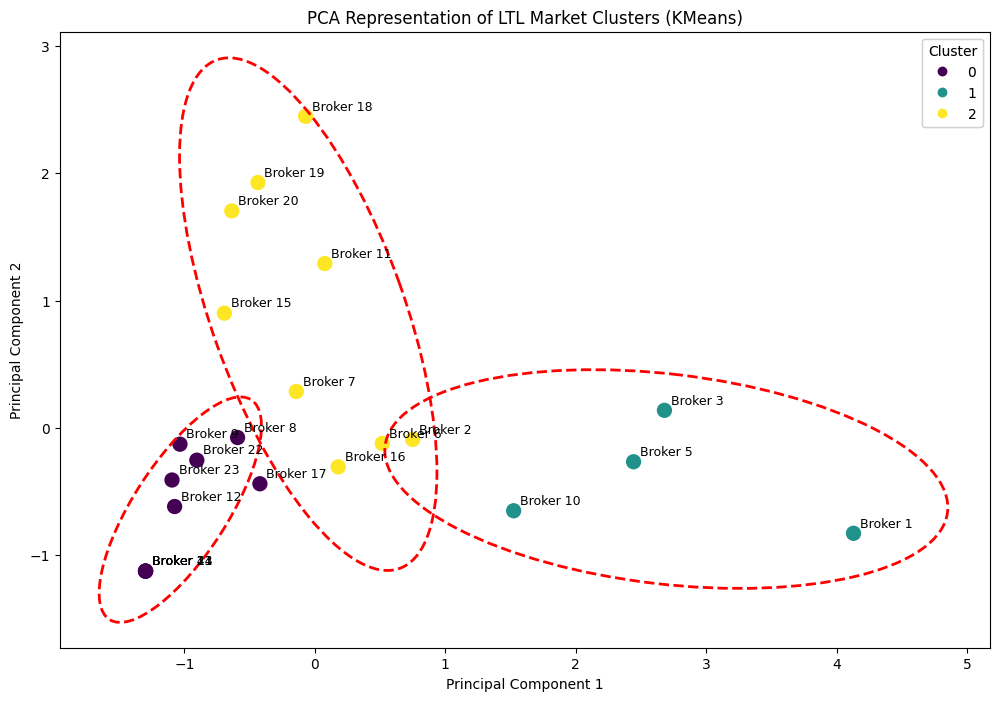

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse
from IPython.display import Image, display

# Ensure your DataFrame "df" is loaded (e.g., from Excel)
# df = pd.read_excel("/mnt/data/Result February Brokerage - 2025.xlsx")

# Create a copy for LTL market analysis
df_ltl = df.copy()

# Define the LTL market columns
ltl_cols = ["Loads LTL", "Ticket LTL", "Rev LTL"]

# Fill NaN values with 0 for the LTL columns
for col in ltl_cols:
    df_ltl[col] = df_ltl[col].fillna(0)

# Prepare the data for clustering
X_ltl = df_ltl[ltl_cols].values

# Standardize the data
scaler_ltl = StandardScaler()
X_ltl_scaled = scaler_ltl.fit_transform(X_ltl)

# Apply KMeans clustering (using 3 clusters as an example)
kmeans_ltl = KMeans(n_clusters=3, random_state=42)
df_ltl["Cluster_LTL"] = kmeans_ltl.fit_predict(X_ltl_scaled)

# Use PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_ltl_scaled)

# Create a 2D scatter plot of the PCA-transformed data
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=df_ltl["Cluster_LTL"],
    cmap="viridis",
    s=100
)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("PCA Representation of LTL Market Clusters (KMeans)")

# Annotate each point with the broker name (from the "Rep" column)
for i, broker in enumerate(df_ltl["Rep"]):
    ax.text(pca_data[i, 0] + 0.05, pca_data[i, 1] + 0.05, broker, fontsize=9)

# Draw ellipses for each cluster using covariance
unique_clusters = np.unique(df_ltl["Cluster_LTL"])
for cluster in unique_clusters:
    indices = df_ltl["Cluster_LTL"] == cluster
    cluster_points = pca_data[indices]

    # Calculate the mean of the cluster points
    mean = np.mean(cluster_points, axis=0)

    # Calculate the covariance matrix, eigenvalues, and eigenvectors
    cov = np.cov(cluster_points, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Sort eigenvalues and eigenvectors in descending order
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # Compute the angle of the ellipse (in degrees)
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))

    # Set a scale factor to adjust the ellipse size (e.g., 2 standard deviations)
    scale_factor = 2
    width = scale_factor * 2 * np.sqrt(eigvals[0])
    height = scale_factor * 2 * np.sqrt(eigvals[1])

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='red', fc='None', lw=2, ls='--')
    ax.add_patch(ellipse)

# Create legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Save and display the plot
plt.savefig("/mnt/data/LTL_PCA_clusters_kmeans_corrected.png")
plt.show()

display(Image("/mnt/data/LTL_PCA_clusters_kmeans_corrected.png"))



In [14]:

# For Spot Market
spot_clusters = df_spot.groupby("Cluster_Spot")["Rep"].apply(list)
print("Spot Market Clusters:")
for cluster, brokers in spot_clusters.items():
    print(f"Cluster {cluster}: {', '.join(brokers)}")

print("\n-----------------\n")

# For LTL Market
ltl_clusters = df_ltl.groupby("Cluster_LTL")["Rep"].apply(list)
print("LTL Market Clusters:")
for cluster, brokers in ltl_clusters.items():
    print(f"Cluster {cluster}: {', '.join(brokers)}")


Spot Market Clusters:
Cluster 0: Broker 3, Broker 4, Broker 5, Broker 7, Broker 8, Broker 9, Broker 10, Broker 16, Broker 17, Broker 18, Broker 19, Broker 20, Broker 21, Broker 22, Broker 23
Cluster 1: Broker 6, Broker 11, Broker 12, Broker 13, Broker 14, Broker 15
Cluster 2: Broker 1, Broker 2

-----------------

LTL Market Clusters:
Cluster 0: Broker 4, Broker 8, Broker 9, Broker 12, Broker 13, Broker 14, Broker 17, Broker 21, Broker 22, Broker 23
Cluster 1: Broker 1, Broker 3, Broker 5, Broker 10
Cluster 2: Broker 2, Broker 6, Broker 7, Broker 11, Broker 15, Broker 16, Broker 18, Broker 19, Broker 20


In [18]:
import pandas as pd

# ----- Spot Market Summary (without Margin) -----
spot_summary = df_spot.groupby("Cluster_Spot")[["Loads Spot", "Ticket Spot", "Rev Spot"]].mean().round(2)
count_spot = df_spot.groupby("Cluster_Spot")["Rep"].count().rename("Count")
spot_summary_overall = pd.concat([spot_summary, count_spot], axis=1).reset_index()

# ----- LTL Market Summary (without Margin) -----
ltl_summary = df_ltl.groupby("Cluster_LTL")[["Loads LTL", "Ticket LTL", "Rev LTL"]].mean().round(2)
count_ltl = df_ltl.groupby("Cluster_LTL")["Rep"].count().rename("Count")
ltl_summary_overall = pd.concat([ltl_summary, count_ltl], axis=1).reset_index()

# Display the summaries as nicely formatted Markdown tables:
print("### Spot Market Clusters Summary")
print(spot_summary_overall.to_markdown(index=False))

print("\n### LTL Market Clusters Summary")
print(ltl_summary_overall.to_markdown(index=False))



### Spot Market Clusters Summary
|   Cluster_Spot |   Loads Spot |   Ticket Spot |   Rev Spot |   Count |
|---------------:|-------------:|--------------:|-----------:|--------:|
|              0 |         7.67 |        936.91 |    12108.8 |      15 |
|              1 |         4.5  |       3086.49 |    13075.5 |       6 |
|              2 |        61.5  |       1962.83 |   120006   |       2 |

### LTL Market Clusters Summary
|   Cluster_LTL |   Loads LTL |   Ticket LTL |   Rev LTL |   Count |
|--------------:|------------:|-------------:|----------:|--------:|
|             0 |        2.3  |       179.35 |    720.07 |      10 |
|             1 |       41.25 |       486.53 |  19774.2  |       4 |
|             2 |        8.78 |       752.06 |   4786.23 |       9 |


In [19]:
# Calculate allocated profit for each segment
df['Profit_Spot'] = df['Profit'] * (df['Rev Spot'] / df['Revenue'])
df['Profit_LTL'] = df['Profit'] * (df['Rev LTL'] / df['Revenue'])

# Calculate margin for each segment
df['Margin_Spot'] = df['Profit_Spot'] / df['Rev Spot']
df['Margin_LTL'] = df['Profit_LTL'] / df['Rev LTL']

# Display a summary table with the results
margin_summary = df[['Rep', 'Revenue', 'Rev Spot', 'Profit_Spot', 'Margin_Spot',
                     'Rev LTL', 'Profit_LTL', 'Margin_LTL']]
print(margin_summary.to_markdown(index=False))

| Rep       |   Revenue |   Rev Spot |   Profit_Spot |   Margin_Spot |   Rev LTL |   Profit_LTL |   Margin_LTL |
|:----------|----------:|-----------:|--------------:|--------------:|----------:|-------------:|-------------:|
| Broker 1  | 147123    |  120842    |     11812.9   |     0.0977544 |  26281.2  |    2569.1    |    0.0977544 |
| Broker 2  | 128628    |  119171    |     12096     |     0.101501  |   9456.93 |     959.891  |    0.101501  |
| Broker 3  |  57600.2  |   35479.8  |      5213.37  |     0.146939  |  22120.5  |    3250.37   |    0.146939  |
| Broker 4  |  46880    |   46880    |      8750     |     0.186647  |    nan    |     nan      |  nan         |
| Broker 5  |  40882.3  |   21891    |      3653.79  |     0.166908  |  18991.3  |    3169.8    |    0.166908  |
| Broker 6  |  34952.9  |   26869.4  |      2644.81  |     0.098432  |   8083.47 |     795.672  |    0.098432  |
| Broker 7  |  30073.7  |   25189.4  |      4759.32  |     0.188941  |   4884.32 |     922.85   

In [20]:
import pandas as pd

# ----- Spot Market Summary (Including Margin) -----
# Ensure df_spot contains: "Loads Spot", "Ticket Spot", "Rev Spot", "Margin", "Rep", and "Cluster_Spot"
spot_summary = df_spot.groupby("Cluster_Spot")[["Loads Spot", "Ticket Spot", "Rev Spot", "Margin"]].mean().round(2)
count_spot = df_spot.groupby("Cluster_Spot")["Rep"].count().rename("Count")
spot_summary_overall = pd.concat([spot_summary, count_spot], axis=1).reset_index()

print("### Spot Market Clusters Summary (Including Margins)")
print(spot_summary_overall.to_markdown(index=False))

# ----- LTL Market Summary (Including Margin) -----
# Ensure df_ltl contains: "Loads LTL", "Ticket LTL", "Rev LTL", "Margin", "Rep", and "Cluster_LTL"
ltl_summary = df_ltl.groupby("Cluster_LTL")[["Loads LTL", "Ticket LTL", "Rev LTL", "Margin"]].mean().round(2)
count_ltl = df_ltl.groupby("Cluster_LTL")["Rep"].count().rename("Count")
ltl_summary_overall = pd.concat([ltl_summary, count_ltl], axis=1).reset_index()

print("\n### LTL Market Clusters Summary (Including Margins)")
print(ltl_summary_overall.to_markdown(index=False))


### Spot Market Clusters Summary (Including Margins)
|   Cluster_Spot |   Loads Spot |   Ticket Spot |   Rev Spot |   Margin |   Count |
|---------------:|-------------:|--------------:|-----------:|---------:|--------:|
|              0 |         7.67 |        936.91 |    12108.8 |     0.2  |      15 |
|              1 |         4.5  |       3086.49 |    13075.5 |     0.12 |       6 |
|              2 |        61.5  |       1962.83 |   120006   |     0.1  |       2 |

### LTL Market Clusters Summary (Including Margins)
|   Cluster_LTL |   Loads LTL |   Ticket LTL |   Rev LTL |   Margin |   Count |
|--------------:|------------:|-------------:|----------:|---------:|--------:|
|             0 |        2.3  |       179.35 |    720.07 |     0.19 |      10 |
|             1 |       41.25 |       486.53 |  19774.2  |     0.15 |       4 |
|             2 |        8.78 |       752.06 |   4786.23 |     0.15 |       9 |


Spot Market Clusters Summary:
              Loads Spot  Ticket Spot   Rev Spot  Margin  Count
Cluster_Spot                                                   
0                   7.67       936.91   12108.84    0.20     15
1                   4.50      3086.49   13075.49    0.12      6
2                  61.50      1962.83  120006.42    0.10      2

LTL Market Clusters Summary:
             Loads LTL  Ticket LTL   Rev LTL  Margin  Count
Cluster_LTL                                                
0                 2.30      179.35    720.07    0.19     10
1                41.25      486.53  19774.20    0.15      4
2                 8.78      752.06   4786.23    0.15      9